The world is multidimensional. A model of the world takes input parameters $\mu \in \mathbb{R}^P$, applies some function, and observations are made of the output. Curse of dimensionality, model reduction.

Explore how model reduction techniques behave for different input functions. 

Function on a circle. Parameters $\mu=(\mu_0, \mu_1, \mu_2, \mu_4)$. $a_k$ functions of $\mu$ 
$$ f(\mu, \theta) = \sum_{k\in\mathbb{Z}} a_k(\mu)e^{i\theta k} $$

We will explore what happens when the $a_k$ have different properties.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import pandas as pd

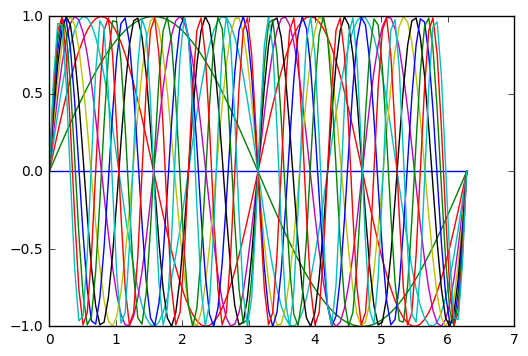

In [2]:
Theta = np.linspace(0,2*np.pi,100)
K=range(11)
#create basis functions e_k
#e=[np.exp(1j*0*Theta)]
e=[np.sin(0*Theta)]

for k in K[1:]:
    #e.append(np.exp(1j*k*Theta))
    e.append(np.sin(k*Theta))
    
for k in K:
    plt.plot(Theta, e[k])
    
plt.show()

# Principal component analysis

PCA is a linear transformation technique for feature extraction which is useful when dealing with high dimensional data. It detects correlations between the observation variables, and computes a new basis for the data that removes redundancy.

Suppose we have $d$ variables, expressed in the random vector $y=[y_1,...y_d]^T$, and we perform $N$ trials. These are assembled into an observation matrix 

$$Y= [ y^{(1)} ... y^{(N)}], $$

where each column is an observation vector. The covariance matrix is given by:

$$S_Y = \frac{1}{N}[ y^{(1)}-E_y\{y\} ... y^{(N)}-E_y\{y\}] [ y^{(1)}-E_y\{y\} ... y^{(N)}-E_y\{y\}]^T,$$

where $E_y\{y\}$ is the expectation of $y$. Often $E_y\{y\}$ is not known, and so $S_Y$ is approximated by the sample covariance matrix 

$$S_Y \approx \frac{1}{N-1}[ y^{(1)}-\bar{y} ... y^{(N)}-\bar{y}] [ y^{(1)}-\bar{y} ... y^{(N)}-\bar{y}]^T,$$

where $\bar{y}= \frac{1}{N}\sum_{n=1}^{N}y^{(n)} = \frac{1}{N}Y1_N $ is the sample mean. In practice, this is often rolled into a data pre-processing step in which the data is "centred" or "whitened"

$$ y^{(n)} \leftarrow y^{(n)}-\bar{y}, $$

and then $S_Y = \frac{1}{N-1} YY^T $.

Reducing redundancy means finding new variables $x=[x_1 ... x_p]$, where $p<d$, where each variable co-varies as little as possible. That is, the sample covariance matrix in the new variables $S_X=\frac{1}{N-1} XX^T $, is diagonal. 

The PCA problem is thus to find an $p \times d$ matrix $W$ such that $X=WY$, $WW^T = I_p$, and $S_X=\frac{1}{N-1} XX^T $ is diagonal. The rows of $W$ are the principal components. 

Note that this formulation encodes a number of assumptions. First, the statement $X=WY$ assumes that the latent variables $x$ are a linear transformation of the observed variables $y$ (and vice versa). Second, $WW^T = I_p$ assumes that the principal components are orthonormal (note the permuted product $W^T W$ is not necessarily $I_d$). Finally, we have assumed that the expectation and variance are sufficient statistics for describing the variables, and thus $x$ and $y$ are Gaussian.

There are several methods of deriving PCA: via Eigenvalue Decomposition, and via Singular Value Decompositon.

### Eigenvalue Decomposition

Starting with the sample covariance matrix in the new variables 
$$S_X=\frac{1}{N-1} XX^T, $$
we substitute in our goal
$$ S_X=\frac{1}{N-1} WYY^TW^T. $$
$YY^T$ is, by definition, a positive semi-definite $d\times d$ matrix, which therefore can be diagonalised as
$$ YY^T  = E D E^T, $$
where the columns of $E$ are the orthonormal eigenvectors of $YY^T$, and $D$ is a diagonal matrix containing the eigenvalues. These entries are ordered in terms of the size of the eigenvalues, and then dimensionality reduction is achieved by truncating the zero (and small) eigenvalues and corresponding eigenvectors such that $D$ becomes a $p \times p$ matrix, and $E$ is $d \times p$. We set $W=E^T$ to give
$$ S_X=\frac{1}{N-1} WW^T D W W^T = \frac{1}{N-1} D, $$
a diagonal matrix, as required.

The eigenvalue derivation highlights another assumption of PCA- that large variance, expressed as a large eigenvalue, corresponds to importance of the latent variable, with the corollary that a small eigenvalue corresponds to noise. 

This assumption may lead to suboptimal results when the components of the observed vector $y$ come from sources on very different scales, such as a volume measured in mL vs a mass measured in kg. This can be overcome by standardising the data in the pre-processing step by dividing each centred variable by its standard deviation 
$$ y_j^{(n)} \leftarrow \frac{y_j^{(n)}-\bar{y_j}}{s_j}, $$
where $s_j^2\approx \frac{\sum (y_j - \bar{y_j})}{N-1}$. 

However, this has its own perils in the following cases 
1. if the variable is constant, the standard deviation will be zero and the standardisation will therefore fail. A constant variable provides no information about the dynamics of a system and should be discarded (although PCA would effectively ignore it anyway).
2. if the variable itself has a small standard deviation, then by rights PCA should assign it low importance. However, if the measurement includes large noise, standardising the data will amplify its effects and PCA would erroneously regard the variable as important.

Thus, the decision on whether to standardise is one the experimentor must make, using their knowledge of the data sources.

### Singular Value Decomposition

We can arrive at the same result using singular value decomposition. The SVD of an $N \times d$ matrix $X$ is written as 
$$ X = U \Sigma V^T $$
where $U$ is an orthonormal $N\times N$ matrix $(U^TU=I_N)$, $\Sigma$ is a pseudo-diagonal $N \times d$ matrix, and  $V$ is an orthonormal $d \times d$ matrix $(V^TV=I_d)$. The columns of $V$ are the eigenvectors of $X^T X$, and thus by setting 
$$ X = \frac{1}{\sqrt{n-1}} Y^T, $$
the SVD of X provides the principal components of $S_Y$ as before. The singular values appear in the diagonal of $\Sigma$. 

The advantage of using SVD over eigenvalue decomposition lies in the existence of efficient algorithms to calculate it. 

In our case study, the observation variables are the values of the functions at the sample points $Y=[\theta_1, ... \theta_d]$. The underlying parameter space is 4-dimensional $\mu = [\mu_0, \mu_1, \mu_2, \mu_3]$.

# Linear Function coefficients

$$a_k(\mu)=a_{k0}\mu_0+a_{k1}\mu_1+a_{k2}\mu_2+a_{k3}\mu_3$$
$a_{ki}$ constant. In our discrete approximation, this example can be written in matrix form 

$$ f(\mu; \Theta) = \left[ e^{0i\theta} \dots e^{Ki\theta} \right] \
\left[ \begin{array}{c} 
-a_0- \\
\vdots \\
-a_K- \end{array} \right] 
\left[ \begin{array}{c} 
\mu_0 \\
\vdots \\
\mu_4 \end{array} \right]\equiv EA\mu$$ 

From this form we see the output function $f$ is indeed a linear transform of the parameters $\mu$. Thus, we should expect PCA to recover the four intrinsic dimensions "perfectly".

We start by setting up the linear functions by creating 10 random 4-vectors $a_0, ..., a_K$

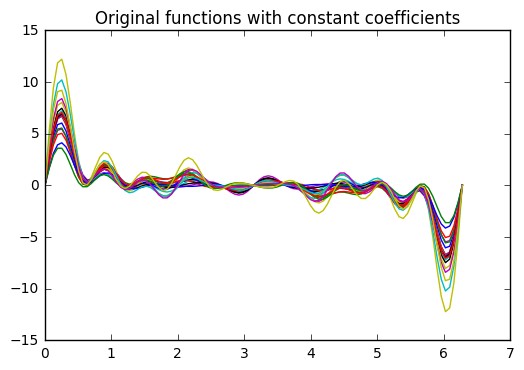

In [3]:
#set up the linear functions by creating random 4-vectors a_0 .. a_K
ak=[]
for k in K:
    ak.append(np.random.rand(4))

#create f(mu,theta) functions for randomly selected mu
fn=20 #number of functions to create
F=np.empty((fn,len(Theta)))

for n in range(fn):
    mu=np.random.rand(4) #choose a random value for mu, uniformly sampled from [0,1]^4
    f=np.zeros(len(Theta))
    for k in K:
        f=f+np.dot(ak[k],mu)*e[k]
    plt.plot(Theta,f)
    F[n]=f 
#F=F.T #so the data is column stacked
plt.title('Original functions with constant coefficients')
plt.show()

For illustration we will perform the PCA with $1-5$ components and compare the errors in the reconstruction.

<function matplotlib.pyplot.show>

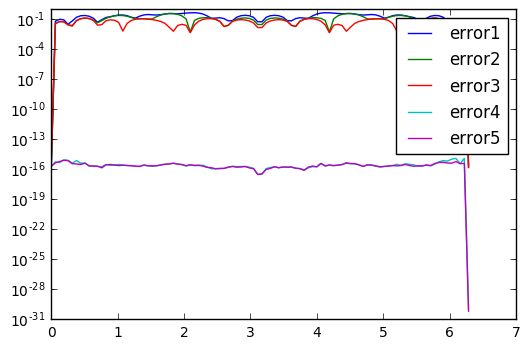

In [4]:
for p in range(1,6):
    pca=PCA(n_components=p, whiten=True)
    pca.fit(F)
    F_pca = pca.transform(F)
    F_new=pca.inverse_transform(F_pca)
    plt.semilogy(Theta, np.mean(np.abs(F-F_new),axis=0),label='error'+str(p))
    
plt.legend()
plt.show

From this we can see that the error dropped significantly (to ~machine accuracy) once the functions are reconstructed with four principal components. This is also reflected in the singular values:

In [5]:
pca.singular_values_

array([2.58854252e+01, 1.00150726e+01, 8.01987325e+00, 3.70159614e+00,
       1.16515643e-14])

The first four principal components are large, while the fifth is on the order of machine error.

In [6]:
pca=PCA(n_components=4, whiten=True)
pca.fit(F)
F_pca = pca.transform(F)
print('original shape', F.shape)
print('transformed shape', F_pca.shape)

original shape (20, 100)
transformed shape (20, 4)


The data has been reduced to 4 dimensions. To see how well the new dimensions describe the data, we can perform the inverse transform and plot the difference between it and the original data.

In [7]:
F_new=pca.inverse_transform(F_pca)
print('new shape', F_new.shape)

new shape (20, 100)


<function matplotlib.pyplot.show>

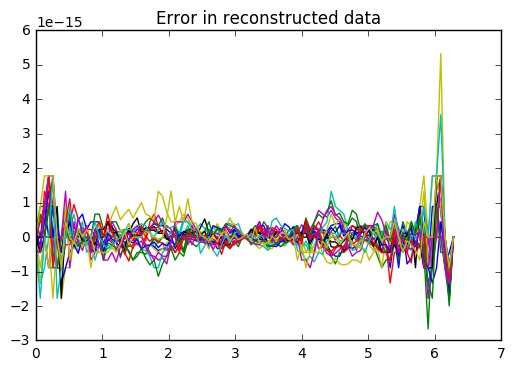

In [8]:
#diff=F-F_new
for n in range(fn):
    plt.plot(Theta,F[n]-F_new[n])

plt.title('Error in reconstructed data')
plt.show

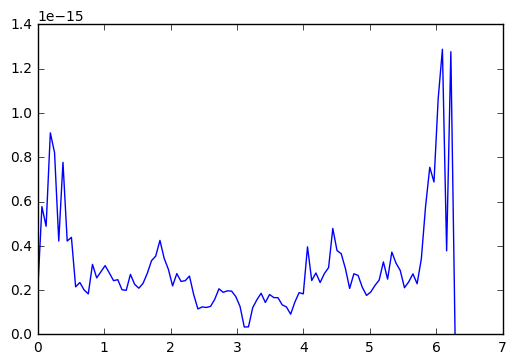

In [9]:
plt.plot(Theta, np.mean(np.abs(F-F_new),axis=0))

We can see the error is on the order of $10^{-15}$, approximately machine error.



# Quadratic Function Coefficients.

$$a_k(\mu)=\frac{1}{2}\mu^T A_k \mu -b_k^T \mu $$

where, wlog, $A_k$ is symmetric, and $b_k$ is a column vector. 


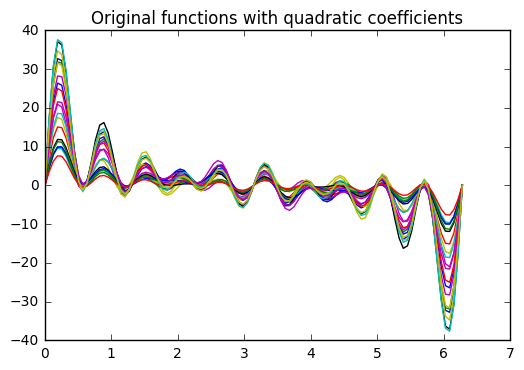

In [10]:
#set up the quadratic functions by creating random 4-by-4 matrices a_0 .. a_K 
# and 4-vectors b_0 ... b_k
ak=[]
bk=[]
for k in K:
    a=np.random.rand(4,4)
    a=0.5*(a+a.T) #symmetrise
    ak.append(a)
    bk.append(np.random.rand(4))

#create f(mu,theta) functions for randomly selected mu
fn=20 #number of functions to create
F=np.empty((fn,len(Theta)))

for n in range(fn):
    mu=np.random.rand(4) #choose a random value for mu, uniformly sampled from [0,1]^4
    f=np.zeros(len(Theta))
    for k in K:
        f=f+(np.dot(mu.T,np.dot(ak[k],mu))+np.dot(bk[k],mu))*e[k]
    plt.plot(Theta,f)
    F[n]=f 
#F=F.T #so the data is column stacked
plt.title('Original functions with quadratic coefficients')
plt.show()

<function matplotlib.pyplot.show>

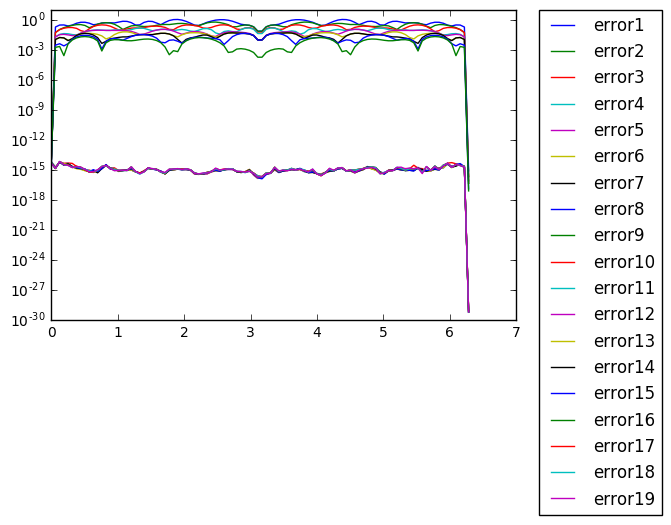

In [11]:
for p in range(1,20):
    pca=PCA(n_components=p, whiten=True)
    pca.fit(F)
    F_pca = pca.transform(F)
    F_new=pca.inverse_transform(F_pca)
    plt.semilogy(Theta, np.mean(np.abs(F-F_new),axis=0),label='error'+str(p))
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show

[1.35311773e+02 2.56055075e+01 1.38838636e+01 8.67749489e+00
 3.66371176e+00 2.89199997e+00 1.29422232e+00 1.11073571e+00
 8.89429911e-01 5.22233897e-01 4.09452131e-14 3.75308066e-14
 1.30289095e-14 1.05267712e-14 1.00135284e-14 7.25182374e-15
 6.95505360e-15 5.97148948e-15 5.33608795e-15]


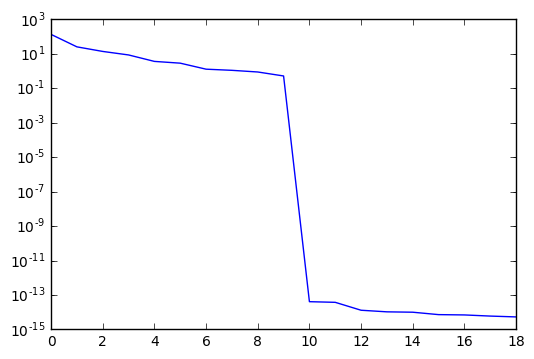

In [12]:
sv=pca.singular_values_
print(sv)
plt.semilogy(range(len(sv)),sv)

There are 10 large singular values, so we see that in this non-linear case, PCA is unable to recover the correct underlying dimensions. We can understand why this is if we recognise we can treat a quadratic function as a linear function in a higher dimension by introducing dummy variables in place of the quadratic terms. For example, consider the two dimensional quadratic
$$ f(x)= ax_1^2 + 2bx_1 x_2 + cx_2^2 = \left[x_1 x_2 \right] \left[ 
\begin{array}{lr}
 a & b \\
 b & c \end{array} \right] 
\left[
 \begin{array}{c}
 x_1 \\
 x_2 \end{array} \right]$$
 
We define dummy variables $y_1=x_1^2$, $y_2=x_1 x_2$, and $y_3=x_2^2$. Then the equation becomes linear
$$ f_2(y) = a y_1 + 2b y_2 + c y_3.$$
Thus a quadratic function in two dimensions has become a linear function in 3 dimensions.

The number of dummy variables is given by the number of independent components in the symmetric matrix $A$. In four dimensions, this is number is 10, thus explaining the 10 principal components. 

But what about the linear terms? If $A$ is invertible, we can complete the square as follows:
$$ \frac{1}{2}x^TAx-b^tx=\frac{1}{2}((x-A^{-1}b)^T A (x-A^{-1}b)- b^T A^{-1}b) $$
the last term is constant, so is effectively ignored by PCA, and so the first term is in the form considered above.

I'm not sure about what happens if $A$ is not invertible.

Rank? Null space? Eigenvectors?

